In [1]:
# Import necessary libraries
import shap
import pandas as pd
import numpy as np
from sklearn.metrics import recall_score, precision_score
from fairlearn.metrics import MetricFrame
from fairlearn.postprocessing import ThresholdOptimizer
import os
original_dir = os.getcwd()
if os.path.basename(original_dir) == "Shap":
    os.chdir(os.path.dirname(original_dir))

# Run the Random Forest notebook to bring the model and data into scope
%run SupervisedModels/SupervisedRandomForest.ipynb

c:\Users\Blake\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


SHAP values matrix:
[[[ 0.00018046 -0.00018046]
  [-0.01236859  0.01236859]
  [ 0.05241272 -0.05241272]
  ...
  [-0.01137858  0.01137858]
  [ 0.00738315 -0.00738315]
  [ 0.01026134 -0.01026134]]

 [[-0.00326125  0.00326125]
  [ 0.01998944 -0.01998944]
  [ 0.03200023 -0.03200023]
  ...
  [ 0.00349689 -0.00349689]
  [ 0.00639772 -0.00639772]
  [ 0.01103757 -0.01103757]]

 [[-0.00272272  0.00272272]
  [-0.01918628  0.01918628]
  [-0.01733101  0.01733101]
  ...
  [-0.0023098   0.0023098 ]
  [ 0.00784348 -0.00784348]
  [-0.00672279  0.00672279]]

 ...

 [[-0.00149542  0.00149542]
  [ 0.01844215 -0.01844215]
  [ 0.04685157 -0.04685157]
  ...
  [ 0.00335996 -0.00335996]
  [ 0.00765373 -0.00765373]
  [ 0.00702692 -0.00702692]]

 [[ 0.01119344 -0.01119344]
  [-0.01186021  0.01186021]
  [ 0.04257819 -0.04257819]
  ...
  [ 0.0045169  -0.0045169 ]
  [ 0.00718325 -0.00718325]
  [ 0.0123466  -0.0123466 ]]

 [[-0.00631485  0.00631485]
  [ 0.02026938 -0.02026938]
  [ 0.04204832 -0.04204832]
  ...
  [ 

<Figure size 640x480 with 0 Axes>

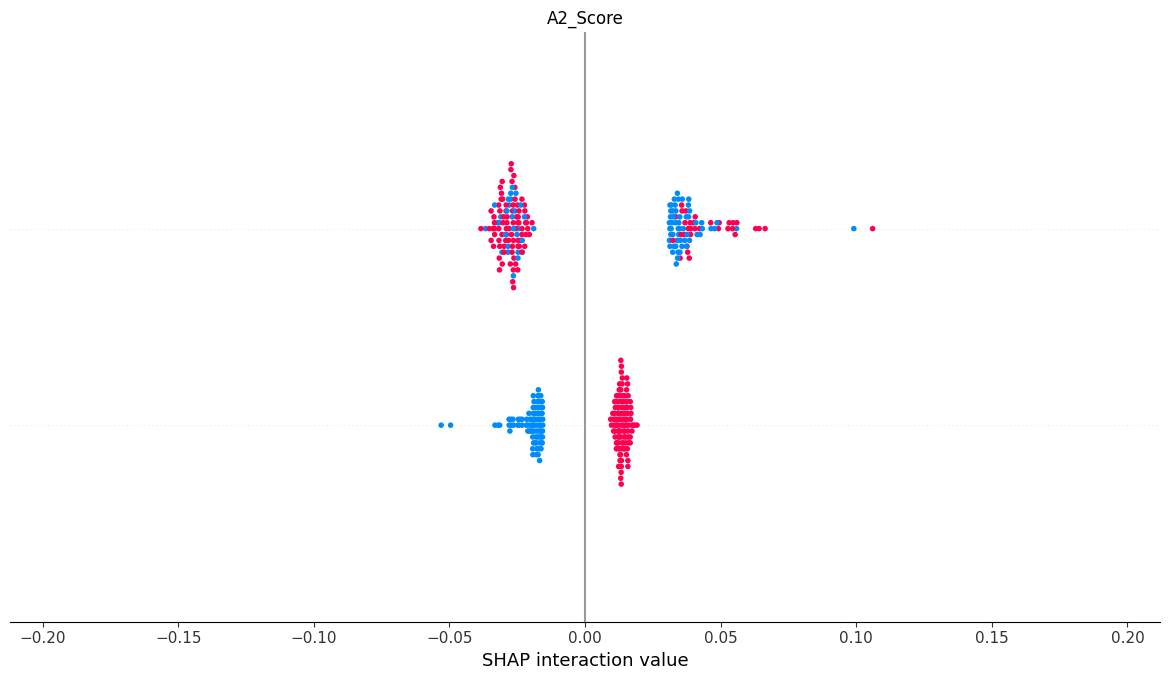

In [2]:
# Calculate SHAP values
explainer = shap.TreeExplainer(rf_model) 

# Ensure X_test is converted to the same format as used during training
if hasattr(rf_model, 'feature_names_in_'):
    X_test = pd.DataFrame(X_test, columns=rf_model.feature_names_in_)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)
# Print SHAP values as a matrix
print("SHAP values matrix:")
print(shap_values)
# Handle cases where shap_values is a single array or a list
if isinstance(shap_values, list):
    shap_values = shap_values[1]  # Use the positive class for binary classification

# Global SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Local SHAP explanation for a single instance
instance_index = 0  # Change this index to analyze different instances
shap.plots.force(
    explainer.expected_value[0], shap_values[0]
)